In [1]:
# -*- coding: utf-8 -*-
# %%
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %% [markdown]
# ### Install packages and import
# %%
# #################################### PLEASE INSTALL LATEST CHROME WEBDRIVER #####################################
# Uncomment to run as required
# #     --install-option="--chromedriver-version= *.**" \
#   --install-option="--chromedriver-checksums=4fecc99b066cb1a346035bf022607104,058cd8b7b4b9688507701b5e648fd821"
# %%
# ##### COPY THE LINES IN THIS COMMENT TO THE TOP OF NEW SCRIPTS #####
# # Function to import this package to other files
# import os
# import sys
# from pathlib import Path

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (
#         unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# main_dir = str(Path(code_dir).parents[0])
# sys.path.append(code_dir)

# from setup_module.imports import *
# from setup_module.params import *
# from setup_module.scraping import *
# from setup_module.classification import *
# from setup_module.vectorizers_classifiers import *

# warnings.filterwarnings("ignore", category=DeprecationWarning)
# %matplotlib notebook
# %matplotlib inline

# %%
import os
import sys
from pathlib import Path

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (
        unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

main_dir = str(Path(code_dir).parents[0])
sys.path.append(code_dir)

from setup_module.imports import *
from setup_module.params import *
from setup_module.scraping import *
from setup_module.classification import *
from setup_module.vectorizers_classifiers import *

warnings.filterwarnings("ignore")

%matplotlib notebook
%matplotlib widget
%matplotlib inline

Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.


<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 6106 entries, 0 to 6105
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Job ID                   6106 non-null   object  
 1   Job Description          6106 non-null   object  
 2   Gender                   6106 non-null   category
 3   Age                      6106 non-null   category
 4   Warmth                   6106 non-null   int8    
 5   Competence               6106 non-null   int8    
 6   Task_Mentioned           6106 non-null   int8    
 7   Task_Warmth              6106 non-null   int8    
 8   Task_Competence          6106 non-null   int8    
 9   Gender_Female            6106 non-null   float64 
 10  Gender_Mixed             6106 non-null   float64 
 11  Gender_Male              6106 non-null   float64 
 12  Age_Older                6106 non-null   float64 
 13  Age_Mixed                6106 non-null   float64 
 14  Age_Youn

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 0.98, 'Training Dataset: Warmth and Competence Sentence Counts')

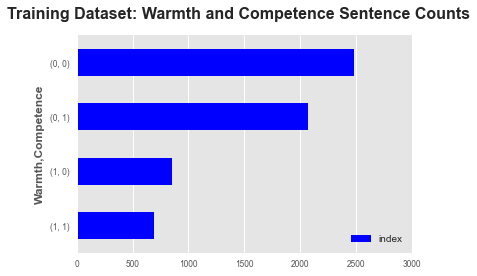

In [2]:
# Visualize data balance
df_jobs_labeled.info()
df_jobs_labeled['Warmth'].value_counts()
df_jobs_labeled['Competence'].value_counts()
warm_comp_count = (
    df_jobs_labeled[analysis_columns]
    .reset_index()
    .groupby(analysis_columns)
    .count()
    .sort_values(by='index')
)
fig, ax = plt.subplots()
fig.suptitle('Training Dataset: Warmth and Competence Sentence Counts', fontsize=16.0)
warm_comp_count.plot(kind='barh', stacked=True, legend=True, color='blue', ax=ax).grid(
    axis='y'
)
if save_enabled == True:
    fig.savefig(f'{plot_save_path}Warmth and Competence Sentence Counts.{image_save_format}', format=image_save_format, dpi=3000)

fig.show()

In [ ]:
text_col = 'Job Description_w2v'

In [3]:
def split_data(df_jobs_labeled, vectorizer, col, text_col):
    # BOW Split
    print('Splitting data into training and test sets.')
    df_jobs_labeled.dropna(subset=['Warmth', 'Competence', text_col], how='any', inplace=True)

    train, test = train_test_split(
        df_jobs_labeled, test_size=test_split, train_size = 1-test_split, random_state=random_state
    )

    validate, test = train_test_split(
        test, test_size=validation_split, random_state=random_state
    )

    X_train = np.array([sent2vec(x) for x in train[f'{str(text_col)}'].astype('str').values])
    prepared_X_train = X_train.to_list()

    y_train = column_or_1d(train[str(col)].astype('int64').values, warn=True)
    prepared_y_train = y_train.to_list()

    X_test = np.array([sent2vec(x) for x in test[f'{str(text_col)}'].astype('str').values])
    prepared_X_test = X_test.to_list()

    y_test = column_or_1d(test[str(col)].astype('int64').values, warn=True)
    prepared_y_test = y_test.to_list()

    X_validate = np.array([sent2vec(x) for x in validate[f'{str(text_col)}'].astype('str').values])
    prepared_X_validate = X_validate.to_list()

    y_validate = column_or_1d(validate[str(col)].astype('int64').values, warn=True)
    prepared_y_validate = y_validate.to_list()

    prepared_text = vectorizer.fit_transform(prepared_X_train+prepared_X_test+prepared_X_validate)

    return train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, prepared_text

In [4]:
# Word Embedding with Fasttext
def word_embedding(df_jobs, X_train, feature_names):

    sentences = df_jobs['2grams_gensim']

    fasttext_model = FastText(sentences, window=3, min_count=1, sorted_vocab=1)

    row=0
    errors=0
    for sent in tqdm.tqdm(sentences):
        sent_vec = np.zeros(100)
        weight_sum =0
        for word in sent:
            try:
                # weight = fasttext_model.wv.get_vector(word)
                # weight_sum += weight
                # sent_vec += weight
                vec = fasttext_model.wv[word]
                feat = X_train[row, feature_names.index(word)]
                sent_vec += (vec * feat)
                weight_sum += feat
            except Exception:
                errors += 1
        sent_vec /= weight_sum
                # print(np.isnan(np.sum(sent_vec)))
    sent_vectors = [sent_vec]
    row += 1
    print(f'errors noted: {str(errors)}')

    return fasttext_model, sent_vectors

In [5]:
def emb_poed(vectorizer, X_train, y_train, X_test, y_test, X_validate, y_validate, feature_names):

    # Get words and offsets
    train_words, train_offsets = train_offset(X_train, 'train')
    test_words, test_offsets = train_offset(X_test, 'test')
    validate_words, validate_offsets = train_offset(X_validate, 'validate')

    if hasattr(vectorizer, 'vocabulary_'):
        vocabulary_map = vectorizer.vocabulary_
        if plots_enabled:
            sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

        embs = load_glove_with_vocabulary(vocabulary_map, feature_names, print_enabled=print_enabled)
        emb_model = BagOfEmbeddings(embs, dropout=0.1, hidden_dim=75, embedding_mode='mean')
        print(f'Embedding Model: {emb_model}')

        loss = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(emb_model.parameters(), lr = 0.001)
        torch.manual_seed(random_state)
        losses = run_training(epochs=1, emb_model=emb_model, optimizer=optimizer, loss_fn=loss,
                            all_words=train_words, all_offsets=train_offsets, all_targets=y_train,
                            batch_size=32)
        print("Training avg emb_model complete!")

        print("Evaluating test set")
        batch_losses, outputs = run_test(emb_model=emb_model, loss_fn=loss,
                            all_words=test_words, all_offsets=test_offsets, all_targets=y_train,
                            batch_size=256)

        print("outputs.shape", outputs.shape)

        boe_pred = outputs.detach().numpy()

        best_threshold_boe, best_score_boe = calculate_best_threshold(y_test[:300], boe_pred[:300], scoring, print_enabled)

        print("boe_pred:\n", boe_pred[10])

        print("Evaluating validate outputs")
        _, validate_outputs = run_test(emb_model=emb_model, loss_fn=None,
                            all_words=validate_words, all_offsets=validate_offsets, all_targets=None,
                            batch_size=256)

        boe_validate_pred = validate_outputs.detach().numpy()
        print("boe_validate_pred:\n", boe_validate_pred[10])
        print("Validate outputs done")

    else:
        vocabulary_map = None
        boe_pred = None
        boe_validate_pred = None
        best_threshold_boe = None
        best_score_boe = None

    return vocabulary_map, boe_pred, boe_validate_pred, best_threshold_boe, best_score_boe

In [6]:
# Get data and target arrays
def vectorize(vectorizer, vectorizer_name, selector, df_jobs_labeled, col, text_col):
    print(
        f'============================ {str(col)}: {vectorizer_name} passed ============================'
    )

    refit_vectorizer = vectorizer

    # BOW Split
    train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, prepared_text = split_data(df_jobs_labeled, vectorizer, col, text_col)

    # BOW fit transform
    X_train = vectorizer.fit_transform(X_train)
    # Selecting best features
    if select_best_enabled == True:
        X_train = selector.fit_transform(X_train, y_train)
    # Oversampling to fix imbalance
    if (resampling_enabled == True) and (col == 'Warmth'):
        X_train, y_train = resample_data(X_train, y_train, col, resampling_enabled, resampling_method)

    # Get feature names
    X_train, vectorizer, dtf_features, X_names, feature_names = get_feature_name_and_refit_X_train_on_chi_test(train, X_train, vectorizer, refit_vectorizer)
    unique_features = set(feature_names)

    # BOW fit
    print('Fitting and transforming data.')
    X_test = vectorizer.transform(X_test)
    X_validate = vectorizer.transform(X_validate)
    # Selecting best features
    if select_best_enabled == True:
        X_test = selector.transform(X_test)
        X_validate = selector.transform(X_validate)
        # Get feature names
        feature_names = selector.get_feature_names_out(vocabulary=X_names)
        unique_features = set(feature_names)

    # y to numpy array
    y_train = torch.from_numpy(np.array(y_train)).float()
    y_test = torch.from_numpy(np.array(y_test)).float()
    if print_enabled:
        print(f'Train targets: {y_train}')
        print(f'Test targets: {y_test}')

    vocabulary_map, boe_pred, boe_validate_pred, best_threshold_boe, best_score_boe = emb_poed(vectorizer, X_train, y_train, X_test, y_test, X_validate, y_validate, feature_names)

    # fasttext_model, sent_vectors = word_embedding(df_jobs, X_train, feature_names)

    return df_jobs_labeled, vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map, best_threshold_boe, best_score_boe, boe_pred, boe_validate_pred


In [7]:
def get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name, save_enabled=save_enabled):

    # Save DF of predictions
    labels = (y_final_validate_prob_pred > best_threshold).astype(int)
    df_preds = pd.DataFrame({f'{str(text_col)}': test[f'{str(text_col)}'], "prediction": labels})
    if save_enabled:
        df_preds.to_csv(f'{df_dir}df_preds_{str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}', index=False)

    return df_preds


In [8]:
def augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled):

    num = len(test) // 2

    best_threshold, best_score = calculate_best_threshold(y_test[:num], y_test_prob_pred[:num], scoring, print_enabled)

    if (boe_pred is not None) and (boe_validate_pred is not None):
        num = len(boe_pred) // 2

        X_final_augmented_train = pd.DataFrame({
            "y_test_prob_pred": y_test_prob_pred[:num],
            "boe_pred": boe_pred[:num].squeeze(),
            "num_words": test["num_words"].values[:num],
            "num_chars": test["num_chars"].values[:num]})
        y_final_augmented_train = y_test[:num]

        X_final_augmented_test = pd.DataFrame({
            "y_test_prob_pred": y_test_prob_pred[num:],
            "boe_pred": boe_pred[num:].squeeze(),
            "num_words": test["num_words"].values[num:],
            "num_chars": test["num_chars"].values[num:]})
        y_final_augmented_test = y_test[num:]

        final_classifier = final_classifier.fit(X_final_augmented_train, y_final_augmented_train)

        if hasattr(final_classifier, 'predict_proba'):
            y_final_test_prob_pred = final_classifier.predict_proba(X_final_augmented_test)[:, 1]
        elif hasattr(final_classifier, '_predict_proba_lr'):
            y_final_test_prob_pred = final_classifier._predict_proba_lr(X_final_augmented_test)[:, 1]

        best_threshold_final, best_score_final = calculate_best_threshold(y_final_augmented_test, y_final_test_prob_pred, scoring, print_enabled)

        X_final_augmented_validate = pd.DataFrame({
            "y_validate_prob_pred": y_validate_prob_pred,
            "boe_validate_pred": boe_validate_pred.squeeze(),
            "num_words": validate["num_words"].values,
            "num_chars": validate["num_chars"].values})
        y_final_augmented_validate = y_validate

        y_final_validate_prob_pred = final_classifier.predict_proba(X_final_augmented_validate)[:,1]

        df_preds = get_df_preds(best_threshold_final, y_final_validate_prob_pred, validate, col, vectorizer_name, classifier_name)

    elif (boe_pred is None) and (boe_validate_pred is None):
        final_classifier = classifier
        X_final_augmented_validate = X_test
        y_final_augmented_validate = y_test
        y_final_validate_prob_pred = y_test_prob_pred
        df_preds = get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name)

    return final_classifier, X_final_augmented_validate, y_final_augmented_validate, y_final_validate_prob_pred, best_threshold, best_score, df_preds

In [9]:
# Fit classifier
def classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred):
    print('\n')
    print(
        f'============================ {str(col)}: {vectorizer_name} + {classifier_name} passed ============================'
    )
    num = len(test) // 2

    # BOW model
    if classifier_name == 'GaussianNB':
        X_train = X_train.todense()
        X_test = X_test.todense()
        X_validate = X_validate.todense()

    if classifier_name == 'Sequential':
        classifier.compile(loss='categorical_crossentropy')
    if hasattr(classifier, 'decision_function') and not hasattr(classifier, 'predict_proba'):
        classifier = CalibratedClassifierCV(classifier, cv = cv, method = 'sigmoid')

    final_classifier = classifier
    classifier = classifier.fit(X_train, y_train)
    classifier = SelectFromModel(estimator=classifier, prefit=True).fit(X_train, y_train)

    if hasattr(classifier, 'predict_proba'):
        y_test_prob_pred = classifier.predict_proba(X_test)
        y_validate_prob_pred = classifier.predict_proba(X_validate)
    elif hasattr(classifier, '_predict_proba_lr'):
        y_test_prob_pred = classifier._predict_proba_lr(X_test)
        y_validate_prob_pred = classifier._predict_proba_lr(X_validate)
    else:
        raise(f'{classifier_name} has neither predict_proba nor _predict_proba_lr attributes.')

    final_classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score, df_preds = augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled)

    return final_classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score

In [10]:
# Evaluate Model
def evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring):

    # Evaluate
    print('\n')
    print('-' * 20)
    print(
        f'EVALUATING FITTED MODEL - {vectorizer_name} + {classifier_name}: ',
        has_fit_parameter(classifier, 'sample_weight'),
    )
    # 5 cross_validation score
    print(f'Cross Validating - {vectorizer_name} + {classifier_name}.')
    cross_validate_score = cross_validate(
        classifier,
        X_test,
        y_test,
        cv=cv,
        return_train_score=True,
        scoring=scores,
    )

    cross_validate_score_noscoring = cross_validate(
        classifier,
        X_test,
        y_test,
        cv=cv,
        return_train_score=True,
    )

    print(
        f'Mean cross_validate scores - {vectorizer_name} + {classifier_name}: {cross_validate_score_noscoring.get("test_score").mean()}'
    )
    numberoflabels = len(set((str(e) for e in y_test.to_list())))

    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Mean Validation Score')
    ] = float(cross_validate_score_noscoring.get('test_score').mean())
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Explained Variance')
    ] = float(
        cross_validate_score.get('test_explained_variance').mean()
    )

    print('-' * 20)
    for key, values in cross_validate_score.items():
        if 'test' in key:
            print(key, ' mean ', values.mean())
    print('-' * 20)
    print('\n')

    # Predictions
    print('-' * 20)
    print(
        f'============================ {str(col)} PREDICTIONS FOR {vectorizer_name.upper()} WITH {classifier_name.upper()} ============================'
    )
    print('\n')
    print(f'y_test_pred - {str(col)} - {vectorizer_name} + {classifier_name}:')
    dic_y_mapping = {n: label for n, label in enumerate(np.unique(y_train))}
    inverse_dic = {v:k for k,v in dic_y_mapping.items()}
    y_train = np.array([inverse_dic[y] for y in y_train])

    y_test_pred = classifier.predict(X_test)
    if classifier_name == 'GaussianNB':
        # y_test_pred = y_test_pred.to_list()
        y_test_pred = classifier.predict(X_test.todense())
    predicted = [dic_y_mapping[np.argmax(pred)] for pred in y_test_pred]
    acc_roc_f1 = evaluate_print(classifier_name + '   |   ', y_test, y_test_pred)
    cm, precision, recall, accuracy, f1, mcc, best_threshold, best_score, report = evaluation(
        y_test, y_test_pred, scoring, print_enabled
    )

    true_negative = cm[0][0]
    false_positives = cm[0][1]
    false_negatives = cm[1][0]
    true_positives = cm[1][1]

    report_test = predict(
        X_test,
        y_test,
        classifier,
        classifier_name,
        col,
        scoring,
        df_jobs_labeled,
        print_enabled,
    )

    print(f'REPORT TEST {str(col)} - {vectorizer_name} + {classifier_name}:\n', report_test)
    print('-' * 20)

    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Accuracy')
    ] = float(accuracy)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Precision')
    ] = float(precision)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Recall')
    ] = float(recall)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'F1-score')
    ] = float(f1)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Matthews Correlation Coefficient'),
    ] = float(mcc)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Threshold'),
    ] = float(best_threshold)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Score'),
    ] = float(best_score)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Classification Report')
    ] = report
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'Confusion Matrix')
    ] = str(cm)

    # Plot
    heatmap = plot_confusion_matrix_percentage(col, cm, classifier_name, vectorizer_name)
    plt.show()
    if save_enabled == True:
        heatmap.figure.savefig(
            f'{plot_save_path}Confusion Matrix {str(col)} - {vectorizer_name} + {classifier_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
            )
    plt.clf()
    plt.cla()
    plt.close()

    # Log Loss Cross Entropy
    if hasattr(classifier, 'predict_proba'):
        y_test_prob_pred = classifier.predict_proba(X_test)[:, 1]
        probability_of_1 = y_test_prob_pred#[:, 1]

        loss = log_loss(y_test, y_test_prob_pred)
        print('\n')
        print('=' * 20)
        print(f'Log Loss / Cross Entropy = {loss}')
        print('=' * 20)
        print('\n')
        table_df.loc[
            (classifier_name),
            (col, vectorizer_name, 'Log Loss/Cross Entropy'),
        ] = float(loss)

        # Explain Model
        explained = explain_model(test, y_test, y_test_pred, y_test_prob_pred, y_train)
        if plots_enabled:
            explained.show_in_notebook(text=txt_instance, predict_proba=False)

        # ROC Curve
        table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc = get_roc_curve(classifier, X_test, y_test, y_test_pred, probability_of_1, vectorizer_name, classifier_name, col)

        # Precision Recall Curve
        get_pr_curve(X_test, y_test, recall, precision, auc, vectorizer_name, classifier_name, col)

    # Optimization
    if optimization_enabled == True and hasattr(classifier, 'predict_log_proba'):
        classifier, table_df, y_test_prob_log_pred, y_test_pred_new, cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, report_opt = optimize_model(
            classifier,
            X_test,
            y_test,
            probability_of_1,
            vectorizer_name,
            classifier_name,
            table_df,
            score)

        # ROC Curve
        table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc = get_roc_curve(classifier, X_test, y_test, y_test_pred_new, probability_of_1, vectorizer_name, classifier_name, col)

        # Precision Recall Curve
        print(f'Precision Recall Curve AFTER OPTIMIZATION - {str(col)} - {vectorizer_name} + {classifier_name}')
        get_pr_curve(X_test, y_test, recall_opt, precision_opt, auc, vectorizer_name, classifier_name, col)

    if hasattr(classifier, 'best_estimator_'):
        ohe_cols = list(
            classifier.best_estimator_.named_steps['vectorizer']
            .named_transformers_['cat']
            .named_steps['ohe']
            .get_feature_names(input_features=categorical)
        )
        num_feats = list(numerical)
        num_feats.extend(ohe_cols)
        feat_imp = eli5.explain_weights_df(
            classifier.best_estimator_.named_steps['classifier'],
            top=10,
            feature_names=num_feats,
        )
        print(
            f'feat_imp - {str(col)} - {vectorizer_name} + {classifier_name}: ',
            feat_imp,
        )
        print('-' * 20)
        print('\n')

    report_test = predict(
        X_test,
        y_test,
        classifier,
        classifier_name,
        col,
        scoring,
        df_jobs_labeled,
        print_enabled,
    )
    print(f'REPORT TEST {str(col)} - {vectorizer_name} + {classifier_name}:\n', report_test)
    print('-' * 20)

    return classifier, table_df

In [11]:
# ROC Curve
def get_roc_curve(classifier, X_test, y_test, y_test_pred, probability_of_1, vectorizer_name, classifier_name, col):
    roc_curve = metrics.plot_roc_curve(classifier, X_test, y_test)
    plt.title(
        f'ROC Curve {str(col)} - {vectorizer_name} + {classifier_name}',
        fontsize=16,
    )
    if save_enabled == True:
        roc_curve.figure_.savefig(
            plot_save_path
            + f'ROC {str(col)} - {classifier_name} - {vectorizer_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
        )
    fpr, tpr, thresholds = metrics.roc_curve(
        y_test, probability_of_1, pos_label=1
    )
    auc = metrics.auc(fpr, tpr)
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'ROC')
    ] = float(roc_auc)
    table_df.loc[
        (classifier_name), (col, vectorizer_name, 'AUC')
    ] = float(auc)

    print('\n')
    print('-' * 20)
    print(f'AUC {str(col)} - {vectorizer_name} + {classifier_name}:\n', auc)

    print('ROC CURVE FOR PREDICTED PROBABILITIES')
    bc = BinaryClassification(y_test, y_test_pred, labels=['0', '1'])
    # Figures
    plt.figure(figsize=(5, 5))
    bc.plot_roc_curve()
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],
                            predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3,
                label='{0} (area={1:0.2f})'.format(classes[i],
                                metrics.auc(fpr, tpr))
                )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05],
            xlabel='False Positive Rate',
            ylabel="True Positive Rate (Recall)",
            title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    return table_df, fpr, tpr, thresholds, auc, roc_curve, roc_auc

In [12]:
# Precision Recall Curve
def get_pr_curve(X_test, y_test, recall, precision, auc, vectorizer_name, classifier_name, col):

    no_skill = len(y_test[y_test == 1]) / len(y_test)
    pr_curve = plt.figure(figsize=(4.0, 4.0))
    plt.plot(
        [0, 1], [no_skill, no_skill], linestyle='--', label='No Skill'
    )
    plt.plot(
        recall, precision, marker='.', label=f'AUC = {auc}'
    )
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(
        f'Precision Recall Curve {str(col)} - {vectorizer_name} + {classifier_name}',
        fontsize=12.0,
    )
    plt.ylabel('Precision', fontsize=12.0)
    plt.xlabel('Recall', fontsize=12.0)
    plt.show()
    if save_enabled == True:
        pr_curve.savefig(
            plot_save_path
            + f'Precision Recall Curve {str(col)} - {vectorizer_name} + {classifier_name}.{image_save_format}',
            format=image_save_format,
            dpi=3000,
        )
    plt.clf()
    plt.cla()
    plt.close()

    classes = np.unique(y_test)
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
            y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3,
                label=f'{classes[i]} (area={metrics.auc(recall, precision):0.2f})')
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',
            ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

In [13]:
# Optimize Model
def optimize_model(classifier, X_test, y_test, probability_of_1, vectorizer_name, classifier_name, table_df, scoring):
    if hasattr(classifier, 'predict_log_proba'):

        y_test_prob_log_pred = classifier.predict_log_proba(X_test)[:, 1]

        # calculate pr-curve
        (
            precision_opt,
            recall_opt,
            thresholds_opt,
        ) = metrics.precision_recall_curve(
            y_test, probability_of_1
        )
        # convert to f score
        fscore_opt = (2 * precision_opt * recall_opt) / (
            precision_opt + recall_opt
        )
        # locate the index of the largest f score
        ix_opt = argmax(fscore_opt)
        best_thresh_opt = thresholds_opt[ix_opt]
        print('=' * 20)
        print(
            f'Best Threshold: {best_thresh_opt}, F-Score={fscore_opt[ix_opt]}'
        )
        print(f'Optimal threshold: {np.exp(best_thresh_opt)}')
        y_test_pred_new = np.where(
            y_test_prob_log_pred[:, 1] > best_thresh_opt, 1, 0
        )
        print(f'New y_test_pred {str(col)} - {vectorizer_name} + {classifier_name}:\n{y_test_pred_new}')

        print(
            f'SCORES FOR {str(col)} - {vectorizer_name} + {classifier_name} AFTER OPTIMIZATION:'
        )
        cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, best_threshold_opt, best_score_opt, report_opt = evaluation(
            y_test, y_test_pred_new, scoring, print_enabled
        )

        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Accuracy_opt')
        ] = float(accuracy_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Precision_opt')
        ] = float(precision_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Recall_opt')
        ] = float(recall_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'F1-score_opt')
        ] = float(f1_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Matthews Correlation Coefficient_opt'),
        ] = float(mcc_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Threshold_opt'),
        ] = float(best_threshold_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, f'{scoring.title()} Best Score_opt'),
        ] = float(best_score_opt)
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Classification Report_opt'),
        ] = report_opt
        table_df.loc[
            (classifier_name), (col, vectorizer_name, 'Confusion Matrix_opt'),
        ] = str(cm_opt)

        print('=' * 20)

    elif not hasattr(classifier, 'predict_log_proba'):
        print('Classifier has no Attribute predict_log_proba.')

    return classifier, table_df, y_test_prob_log_pred, y_test_pred_new, cm_opt, precision_opt, recall_opt, accuracy_opt, f1_opt, mcc_opt, report_opt

In [14]:
# Save Model
def saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name, save_enabled = True, task_enabled = False):
    if save_enabled == True:
        if task_enabled == False:
            classifier_save_path = (
                f'{models_save_path}Model {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
            )
            vectorizer_save_path = (
                f'{models_save_path}Vectorizer {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
            )
            if select_best_enabled == True:
                selector_save_path = (
                    f'{models_save_path}Selector {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}'
                )

        elif task_enabled == True:
            classifier_save_path = (
                f'{models_save_path}Model {str(col)} - {vectorizer_name} + {classifier_name}_WITH_TASK.{file_save_format}'
            )
            vectorizer_save_path = (
                f'{models_save_path}Vectorizer {str(col)} - {vectorizer_name} + {classifier_name}_WITH_TASK.{file_save_format}'
            )
            if select_best_enabled == True:
                selector_save_path = (
                    f'{models_save_path}Selector {str(col)} - {vectorizer_name} + {classifier_name}_WITH_TASK.{file_save_format}'
                )

        # Save classifier
        print(f'Saving Model and Table for {vectorizer_name} + {classifier_name}.')
        table_df.to_csv(table_save_path + csv_file_name)
        table_df.to_pickle(table_save_path + pickle_file_name)
        table_df.to_excel(table_save_path + excel_file_name)
        table_df.to_latex(table_save_path + latex_file_name)
        table_df.to_markdown(table_save_path + markdown_file_name)

        with open(classifier_save_path, 'wb') as f:
            joblib.dump(classifier, f)
        with open(vectorizer_save_path, 'wb') as f:
            joblib.dump(vectorizer, f)
        if select_best_enabled == True:
            with open(selector_save_path, 'wb') as f:
                joblib.dump(selector, f)

    elif save_enabled == False:
        print('Saving Model and Table is disabled.')



In [15]:
def classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring):

    if classifier_name == 'DummyClassifier' and use_dict_for_classifiers_vectorizers == False:
        classifier_name += f' - {str(classifier.strategy).title()}'
    classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score = classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred)
    classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)

    return classifier, table_df, X_test, y_test, y_test_prob_pred



In [16]:
def no_pipe(df_jobs_labeled, vectorizers, selector, classifiers, col, text_col, scoring, table_df, table_save_path, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name):

    print('Not using Search')

    if use_dict_for_classifiers_vectorizers == True:
        print('Using dict for classifiers and vectorizers.')
        for vectorizer_name, vectorizer_and_params in vectorizers.items():
            vectorizer = vectorizer_and_params[0]
            vectorizer_params = vectorizer_and_params[1]
            vectorizer.set_params(**vectorizer_params)
            df_jobs_labeled, vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map, best_threshold_boe, best_score_boe, boe_pred, boe_validate_pred = vectorize(vectorizer, vectorizer_name, selector, df_jobs_labeled, col, text_col)

            for classifier_name, classifier_and_params in classifiers.items():
                classifier = classifier_and_params[0]
                classifier_params = classifier_and_params[1]
                classifier.set_params(**classifier_params)
                classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                if save_enabled == True:
                    saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    elif use_dict_for_classifiers_vectorizers == False:
        print('Using list for classifiers and vectorizers.')
        for vectorizer in vectorizers_lst:
            vectorizer_name = vectorizer.__class__.__name__
            df_jobs_labeled, vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map, best_threshold_boe, best_score_boe, boe_pred, boe_validate_pred = vectorize(vectorizer, vectorizer_name, selector, df_jobs_labeled, col, text_col)

            for classifier in classifiers_lst:
                classifier_name = classifier.__class__.__name__
                classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                if save_enabled == True:
                    saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    return df_jobs_labeled, classifier, vectorizers, selector, table_df



In [17]:
def pipe(df_jobs_labeled, vectorizers_pipe, selectors_pipe, classifiers_pipe, col, text_col, scoring, table_df, table_save_path, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name):

    print('Using Search')

    print('Using dict for classifiers and vectorizers.')

    # Vectorization
    for vectorizer_name, vectorizer_and_params in vectorizers_pipe.items():
        vectorizer = vectorizer_and_params[0]
        vectorizer_params = vectorizer_and_params[1]

        # Selection
        for selector_name, selector_and_params in selectors_pipe.items():
            selector = selector_and_params[0]
            selector_params = selector_and_params[1]

            # Classification
            for classifier_name, classifier_and_params in classifiers_pipe.items():
                classifier = classifier_and_params[0]
                classifier_params = classifier_and_params[1]

                # Pipeline
                if select_best_enabled == True:
                    ## Steps
                    steps = [
                        (vectorizer_name, vectorizer),
                        (selector_name, selector),
                        (classifier_name, classifier)
                    ]
                    ## Params
                    param_grid = {
                        **vectorizer_params,
                        **selector_params,
                        **classifier_params,
                    }
                    ## Pipeline
                    pipe = Pipeline(steps=steps)

                    ## Vectorizers, selectors, classifiers
                    vectorizer = pipe[:-2]
                    selector = pipe[:-1]
                    classifier = pipe[:]

                elif select_best_enabled == False:
                    ## Steps
                    steps = [
                        (vectorizer_name, vectorizer),
                        (classifier_name, classifier)
                    ]
                    ## Params
                    param_grid = {
                        **vectorizer_params,
                        **classifier_params,
                    }
                    ## Pipeline
                    pipe = Pipeline(steps=steps)

                    ## Vectorizers, selectors, classifiers
                    vectorizer = pipe[:-1]
                    classifier = pipe[:]

                # Search
                search = RandomizedSearchCV(
                    estimator=pipe,
                    param_distributions=param_grid,
                    n_jobs=-1,
                    scoring=scores,
                    cv=cv,
                    refit=scores[0],
                    return_train_score=True,
                    verbose=3,
                )

                # Fit SearchCV
                searchcv = search.fit(X_train, y_train)

                # Best Parameters
                best_index = searchcv.best_index_
                cv_results = sorted(searchcv.cv_results_)
                best_params = searchcv.best_params_
                classifier = searchcv.best_estimator_
                y_train_pred = classifier.predict(X_train)
                best_score = searchcv.best_score_
                n_splits = searchcv.n_splits_

                print('=' * 20)
                print(f'Best index for {scores[0]}: {best_index}')
                print(f'Best classifier for {scores[0]}: {classifier}')
                print(f'Best y_train_pred for {scores[0]}: {y_train_pred}')
                print(f'Best score for {scores[0]}: {best_score}')
                print(f'Number of splits for {scores[0]}: {n_splits}')

                print('-' * 20)
                report = classification_report(y_train, y_train_pred)
                print(f'Classification Report:\n{report}')
                ConfusionMatrixDisplay.from_estimator(
                    searchcv, X_test, y_test, xticks_rotation="vertical"
                )
                plt.tight_layout()
                plt.show()
                print('=' * 20)

                # Make the predictions
                score = searchcv.score(X_test, y_test)
                y_test_pred = searchcv.predict(X_test)
                if hasattr(searchcv, 'predict_proba'):
                    y_test_prob_pred = searchcv.predict_proba(X_test)[:, 1]
                    y_validate_prob_pred = searchcv.predict_proba(X_validate)[:, 1]
                elif hasattr(searchcv, '_predict_proba_lr'):
                    y_test_prob_pred = searchcv._predict_proba_lr(X_test)[:, 1]
                    y_validate_prob_pred = searchcv._predict_proba_lr(X_validate)[:, 1]

                # Fit Best Model
                print(f'Fitting {classifier}.')
                classifier.set_params(**classifier.get_params())
                classifier = classifier.fit(X_train, y_train)

                # Evaluate Model
                classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)

                # Save Vectorizer, Selector, and Classifier
                if save_enabled == True:
                    saving_model_and_table(vectorizer, vectorizer_name, selector, selector_name, classifier, classifier_name, col, table_save_path, table_df, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    return df_jobs_labeled, searchcv, classifier, vectorizers, selector, table_df



# Training Supervised Model: Warmth and Competence

In [18]:
for col in tqdm.tqdm(analysis_columns):
    print('-' * 20)
    print('\n')
    print(f'============================ STARTING PROCESSING {col.upper()} ============================')
    print('\n')
    print('-' * 20)
    if (
        len(
            df_jobs_labeled[
                df_jobs_labeled[str(col)].map(
                    df_jobs_labeled[str(col)].value_counts() > 50
                )
            ]
        )
        != 0
    ):

        # BOW Split
        train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, prepared_text = split_data(df_jobs_labeled, vectorizer, col, text_col)

        if search_enabled == False:
            df_jobs_labeled, classifier, vectorizers, selector, table_df = no_pipe(df_jobs_labeled, vectorizers, selector, classifiers, col, text_col, scoring, table_df, table_save_path, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

        elif search_enabled == True:
            df_jobs_labeled, searchcv, classifier, vectorizers, selector, table_df = pipe(df_jobs_labeled, vectorizers_pipe, selectors_pipe, classifiers_pipe, col, text_col, scoring, table_df, table_save_path, models_save_path, csv_file_name, pickle_file_name, excel_file_name, latex_file_name, markdown_file_name)

    print('-' * 20)
    print('\n')
    print(f'============================ FINISHED PROCESSING {col.upper()} ============================')
    print('\n')
    print('-' * 20)



  0%|          | 0/2 [00:00<?, ?it/s]

--------------------


============================ STARTING PROCESSING WARMTH ============================


--------------------
Not using Search
Using dict for classifiers and vectorizers.
============================ Warmth: CountVectorizer passed ============================
Splitting data into training and test sets.
Resampling Warmth to fix imbalance.
--------------------
Original dataset shape (4579,)
Original dataset, counts of label "1": 1180
Original dataset, counts of label "0": 3399
Resampled dataset shape (4579,)
Resampled dataset, counts of label "1": 1180
Resampled dataset, counts of label "0": 3399
--------------------
Fitting and transforming data.
Train words shape: torch.Size([55350])
Train offsets shape: torch.Size([6783])
Created words and offsets for train data
Test words shape: torch.Size([5115])
Test offsets shape: torch.Size([611])
Created words and offsets for test data
Validate words shape: torch.Size([7784])
Validate offsets shape: torch.Size([916])
Created

  0%|          | 0/2 [00:58<?, ?it/s]


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [19]:
print('Not using Search')

if use_dict_for_classifiers_vectorizers == True:
    print('Using dict for classifiers and vectorizers.')
    for vectorizer_name, vectorizer_and_params in vectorizers.items():
        vectorizer = vectorizer_and_params[0]
        vectorizer_params = vectorizer_and_params[1]
        vectorizer.set_params(**vectorizer_params)
        df_jobs_labeled, vectorizer, selector, train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, feature_names, unique_features, vocabulary_map, best_threshold_boe, best_score_boe, boe_pred, boe_validate_pred = vectorize(vectorizer, vectorizer_name, selector, df_jobs_labeled, col, text_col)

        for classifier_name, classifier_and_params in classifiers.items():
            classifier = classifier_and_params[0]
            classifier_params = classifier_and_params[1]
            classifier.set_params(**classifier_params)
            # classifier, table_df, X_test, y_test, y_test_prob_pred = classify_and_evaluate(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred, table_df, col, text_col, scoring)


Not using Search
Using dict for classifiers and vectorizers.


CountVectorizer(lowercase='True', max_features=10000, ngram_range=(1, 3),
                stop_words='english')

============================ Warmth: CountVectorizer passed ============================
Splitting data into training and test sets.
Resampling Warmth to fix imbalance.
--------------------
Original dataset shape (4579,)
Original dataset, counts of label "1": 1180
Original dataset, counts of label "0": 3399
Resampled dataset shape (4579,)
Resampled dataset, counts of label "1": 1180
Resampled dataset, counts of label "0": 3399
--------------------
Fitting and transforming data.
Train words shape: torch.Size([54776])
Train offsets shape: torch.Size([6777])
Created words and offsets for train data
Test words shape: torch.Size([5115])
Test offsets shape: torch.Size([611])
Created words and offsets for test data
Validate words shape: torch.Size([7784])
Validate offsets shape: torch.Size([916])
Created words and offsets for validate data
Embedding Model: BagOfEmbeddings(
  (dropout): Dropout(p=0.1, inplace=False)
  (embedding): EmbeddingBag(10000, 300, mode=mean)
  (final_layer): Sequential

DummyClassifier(random_state=42, strategy='most_frequent')

DummyClassifier(random_state=42, strategy='stratified')

DummyClassifier(random_state=42, strategy='uniform')

MultinomialNB(alpha=0.1)

GaussianNB()

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=1,
                   random_state=42, solver='liblinear')

PassiveAggressiveClassifier(class_weight='balanced', n_jobs=1, random_state=42,
                            tol=0.0001)

LinearSVC(class_weight='balanced', loss='hinge', random_state=42)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=10, n_jobs=1, random_state=42)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, sample_type='weighted', scale_pos_weight=None,
              seed=1337, silent=1, subsample=0.8, ...)

MLPClassifier(random_state=42)

MLPRegressor(random_state=42)

VotingClassifier(estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                             ('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 n_jobs=1, voting='soft')

StackingClassifier(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                               ('Logistic Regression',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=42))],
                   final_estimator=RandomForestClassifier(class_weight={0: 1,
                                                                        1: 2},
                                                          random_state=42),
                   n_jobs=1)

TfidfVectorizer(lowercase='True', max_features=10000, ngram_range=(1, 3),
                stop_words='english', use_idf='True')

============================ Warmth: TfidfVectorizer passed ============================
Splitting data into training and test sets.
Resampling Warmth to fix imbalance.
--------------------
Original dataset shape (4579,)
Original dataset, counts of label "1": 1180
Original dataset, counts of label "0": 3399
Resampled dataset shape (4579,)
Resampled dataset, counts of label "1": 1180
Resampled dataset, counts of label "0": 3399
--------------------
Fitting and transforming data.
Train words shape: torch.Size([102664])
Train offsets shape: torch.Size([6790])
Created words and offsets for train data
Test words shape: torch.Size([5115])
Test offsets shape: torch.Size([611])
Created words and offsets for test data
Validate words shape: torch.Size([7784])
Validate offsets shape: torch.Size([916])
Created words and offsets for validate data
Embedding Model: BagOfEmbeddings(
  (dropout): Dropout(p=0.1, inplace=False)
  (embedding): EmbeddingBag(10000, 300, mode=mean)
  (final_layer): Sequentia

DummyClassifier(random_state=42, strategy='most_frequent')

DummyClassifier(random_state=42, strategy='stratified')

DummyClassifier(random_state=42, strategy='uniform')

MultinomialNB(alpha=0.1)

GaussianNB()

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=1,
                   random_state=42, solver='liblinear')

PassiveAggressiveClassifier(class_weight='balanced', n_jobs=1, random_state=42,
                            tol=0.0001)

LinearSVC(class_weight='balanced', loss='hinge', random_state=42)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=10, n_jobs=1, random_state=42)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, sample_type='weighted', scale_pos_weight=None,
              seed=1337, silent=1, subsample=0.8, ...)

MLPClassifier(random_state=42)

MLPRegressor(random_state=42)

VotingClassifier(estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                             ('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 n_jobs=1, voting='soft')

StackingClassifier(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                               ('Logistic Regression',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=42))],
                   final_estimator=RandomForestClassifier(class_weight={0: 1,
                                                                        1: 2},
                                                          random_state=42),
                   n_jobs=1)

FeatureUnion(transformer_list=[('CountVectorizer',
                                CountVectorizer(lowercase='True',
                                                max_features=10000,
                                                ngram_range=(1, 3),
                                                stop_words='english')),
                               ('TfidfVectorizer',
                                TfidfVectorizer(lowercase='True',
                                                max_features=10000,
                                                ngram_range=(1, 3),
                                                stop_words='english',
                                                use_idf='True'))])

============================ Warmth: UnionBOW passed ============================
Splitting data into training and test sets.
Resampling Warmth to fix imbalance.
--------------------
Original dataset shape (4579,)
Original dataset, counts of label "1": 1180
Original dataset, counts of label "0": 3399
Resampled dataset shape (4579,)
Resampled dataset, counts of label "1": 1180
Resampled dataset, counts of label "0": 3399
--------------------
Fitting and transforming data.
Train words shape: torch.Size([174048])
Train offsets shape: torch.Size([6789])
Created words and offsets for train data
Test words shape: torch.Size([10230])
Test offsets shape: torch.Size([611])
Created words and offsets for test data
Validate words shape: torch.Size([15568])
Validate offsets shape: torch.Size([916])
Created words and offsets for validate data


DummyClassifier(random_state=42, strategy='most_frequent')

DummyClassifier(random_state=42, strategy='stratified')

DummyClassifier(random_state=42, strategy='uniform')

MultinomialNB(alpha=0.1)

GaussianNB()

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=1,
                   random_state=42, solver='liblinear')

PassiveAggressiveClassifier(class_weight='balanced', n_jobs=1, random_state=42,
                            tol=0.0001)

LinearSVC(class_weight='balanced', loss='hinge', random_state=42)

DecisionTreeClassifier(random_state=42)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=10, n_jobs=1, random_state=42)

GradientBoostingClassifier(random_state=42)

AdaBoostClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, sample_type='weighted', scale_pos_weight=None,
              seed=1337, silent=1, subsample=0.8, ...)

MLPClassifier(random_state=42)

MLPRegressor(random_state=42)

VotingClassifier(estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                             ('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 n_jobs=1, voting='soft')

StackingClassifier(cv=KFold(n_splits=2, random_state=None, shuffle=False),
                   estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                               ('Logistic Regression',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=42))],
                   final_estimator=RandomForestClassifier(class_weight={0: 1,
                                                                        1: 2},
                                                          random_state=42),
                   n_jobs=1)

In [20]:
if classifier_name == 'DummyClassifier' and use_dict_for_classifiers_vectorizers == False:
    classifier_name += f' - {str(classifier.strategy).title()}'
# classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score = classify(train, X_train, y_train, test, X_test, y_test, validate, X_validate, y_validate, classifier, classifier_name, vectorizer, vectorizer_name, boe_pred, boe_validate_pred)
# classifier, table_df = evaluate_model(X_train, y_train, X_test, y_test, table_df, classifier, classifier_name, vectorizer, vectorizer_name, col, text_col, scoring)


In [21]:
print('\n')
print(
    f'============================ {str(col)}: {vectorizer_name} + {classifier_name} passed ============================'
)
num = len(test) // 2

# BOW model
if classifier_name == 'GaussianNB':
    X_train = X_train.todense()
    X_test = X_test.todense()
    X_validate = X_validate.todense()

if classifier_name == 'Sequential':
    classifier.compile(loss='categorical_crossentropy')
if hasattr(classifier, 'decision_function') and not hasattr(classifier, 'predict_proba'):
    classifier = CalibratedClassifierCV(classifier, cv = cv, method = 'sigmoid')

final_classifier = classifier
classifier = classifier.fit(X_train, y_train)

if hasattr(classifier, 'predict_proba'):
    y_test_prob_pred = classifier.predict_proba(X_test)
    y_validate_prob_pred = classifier.predict_proba(X_validate)
elif hasattr(classifier, '_predict_proba_lr'):
    y_test_prob_pred = classifier._predict_proba_lr(X_test)
    y_validate_prob_pred = classifier._predict_proba_lr(X_validate)
else:
    raise(f'{classifier_name} has neither predict_proba nor _predict_proba_lr attributes.')

# final_classifier, X_test, y_test, y_test_prob_pred, best_threshold, best_score, df_preds = augment(classifier, classifier_name, vectorizer, vectorizer_name, final_classifier, test, y_test, y_test_prob_pred, validate, y_validate, y_validate_prob_pred, boe_pred, boe_validate_pred, scoring, print_enabled)




============================ Warmth: UnionBOW + StackingClassifier passed ============================


In [26]:
num = len(test) // 2

best_threshold, best_score = calculate_best_threshold(y_test[:num], y_test_prob_pred[:num], scoring, print_enabled)

if (boe_pred is not None) and (boe_validate_pred is not None):
    num = len(boe_pred) // 2

    X_final_augmented_train = pd.DataFrame({
        "y_test_prob_pred": y_test_prob_pred[:num],
        "boe_pred": boe_pred[:num].squeeze(),
        "num_words": test["num_words"].values[:num],
        "num_chars": test["num_chars"].values[:num]})
    y_final_augmented_train = y_test[:num]

    X_final_augmented_test = pd.DataFrame({
        "y_test_prob_pred": y_test_prob_pred[num:],
        "boe_pred": boe_pred[num:].squeeze(),
        "num_words": test["num_words"].values[num:],
        "num_chars": test["num_chars"].values[num:]})
    y_final_augmented_test = y_test[num:]

    final_classifier = final_classifier.fit(X_final_augmented_train, y_final_augmented_train)

    if hasattr(final_classifier, 'predict_proba'):
        y_final_test_prob_pred = final_classifier.predict_proba(X_final_augmented_test)[:, 1]
    elif hasattr(final_classifier, '_predict_proba_lr'):
        y_final_test_prob_pred = final_classifier._predict_proba_lr(X_final_augmented_test)[:, 1]

    best_threshold_final, best_score_final = calculate_best_threshold(y_final_augmented_test, y_final_test_prob_pred, scoring, print_enabled)

    X_final_augmented_validate = pd.DataFrame({
        "y_validate_prob_pred": y_validate_prob_pred,
        "boe_validate_pred": boe_validate_pred.squeeze(),
        "num_words": validate["num_words"].values,
        "num_chars": validate["num_chars"].values})
    y_final_augmented_validate = y_validate

    y_final_validate_prob_pred = final_classifier.predict_proba(X_final_augmented_validate)[:,1]

    df_preds = get_df_preds(best_threshold_final, y_final_validate_prob_pred, validate, col, vectorizer_name, classifier_name)

elif (boe_pred is None) and (boe_validate_pred is None):
    final_classifier = classifier
    X_final_augmented_validate = X_test
    y_final_augmented_validate = y_test
    y_final_validate_prob_pred = y_test_prob_pred
    df_preds = get_df_preds(best_threshold, y_final_validate_prob_pred, test, col, vectorizer_name, classifier_name)


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [29]:
y_test[:num].shape

torch.Size([305])

In [30]:
y_test = y_test[:num]
y_test_pred = y_test_prob_pred[:num]

In [32]:
scorer

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [31]:
best_threshold = -1
best_score = -1
for threshold in np.arange(0.01, 0.801, 0.01):
    threshold = np.round(threshold, 2)

    # globals()[f'metrics.{scoring.lower()}_score']
    if scoring.lower() == 'recall':
        scorer = metrics.recall_score
    elif scoring.lower() == 'f1 score':
        scorer = metrics.f1_score
    else:
        raise ValueError(f'{scoring.title()} is not a valid score')

    emb_model_score = scorer(y_true=y_test, y_pred=(y_test_pred > threshold).astype(int))
    if emb_model_score > best_score:
        best_score = emb_model_score
        best_threshold = threshold
    if print_enabled:
        print(f'{scoring.title()} at threshold {threshold}: {emb_model_score}')
print(f'{scoring.title()} at best threshold {best_threshold}: {best_score}')


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets